Heart Attack Prediction using Machine Learning  
=====
The goal of this project is to analyse a dataset with patient information. Based on the analysis, the app will predict whether a new patient has a risk of future coronary heart attack.  
This experiment uses 3 models and identifies the best one based on calculated accuracy, precision, recall and F1-score.  

> The models selected for this experiment are: 
> - logistic regression
> - k-nearest neighbors
> - support vector machine  
>
> Each of them will be described below

# Import Libraries
***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from operator import add

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1. Data Preparation  
## 1.1. Read CSV File  

The dataset is publicly available on the [Kaggle website](https://www.kaggle.com/datasets). All data is taken from an ongoing cardiovascular study on residents of the city of [Framingham, Massachusets](https://biolinkk.nhlbi.nih.gov/studies/framcohort).  
The dataset provides patients' information about cardiovascular status. It includes **over 4000 records** on 15 attributes. Each attribute is a potential risk factor. There are demographic, behavioral, as well as medical risk factors.

In [5]:
data = pd.read_csv("Data/db.csv")
data

,gender,age,education,smoker,cigarettesPerDay,onMedication,hadStroke,isHypertensive,isDiabetic,cholesterolLevel,systolicBloodPressure,diastolicBloodPressure,BMI,heartRate,glucoseLevel,onRisk
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


- **Gender:** male or female (Nominal)
- **Age:** Age of the patient (Continuous — Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
- **Current Smoker:** whether or not the patient is a current smoker (Nominal)
- **Cigarettes Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
- **On Medication:** whether or not the patient was on blood pressure medication (Nominal)
- **Had Stroke:** whether or not the patient had previously had a stroke (Nominal)
- **Is Hypertensive:** whether or not the patient was hypertensive (Nominal)
- **Is Diabetes:** whether or not the patient had diabetes (Nominal)
- **Cholesterol Level:** total cholesterol level (Continuous)
- **Systolic Blood Pressure:** systolic blood pressure (Continuous)
- **Diastolic Blood Pressure:** diastolic blood pressure (Continuous)
- **BMI:** Body Mass Index (Continuous)
- **Heart Rate:** heart rate (Continuous — In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- **Glucose Level:** blood glucose level (Continuous)

> Education should not impact the model training and prediction, therefore it will be removed.

In [7]:
data.drop(["education"], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  4240 non-null   int64  
 1   age                     4240 non-null   int64  
 2   smoker                  4240 non-null   int64  
 3   cigarettesPerDay        4211 non-null   float64
 4   onMedication            4187 non-null   float64
 5   hadStroke               4240 non-null   int64  
 6   isHypertensive          4240 non-null   int64  
 7   isDiabetic              4240 non-null   int64  
 8   cholesterolLevel        4190 non-null   float64
 9   systolicBloodPressure   4240 non-null   float64
 10  diastolicBloodPressure  4240 non-null   float64
 11  BMI                     4221 non-null   float64
 12  heartRate               4239 non-null   float64
 13  glucoseLevel            3852 non-null   float64
 14  onRisk                  4240 non-null   

In [ ]:
data.describe().transpose()

,gender,age,smoker,cigarettesPerDay,onMedication,hadStroke,isHypertensive,isDiabetic,cholesterolLevel,systolicBloodPressure,diastolicBloodPressure,BMI,heartRate,glucoseLevel,onRisk
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## 1.2. Process Data  
### 1.2.1. Identify all features with Null values  
***

In [10]:
total_missing_data = data.isnull().sum().sort_values(ascending = False)
percentage_missing_data = (total_missing_data / data.isnull().count()) * 100

missing_data = pd.concat([total_missing_data, percentage_missing_data], axis = 1, keys = ["Missing Data", "Percentage"])
missing_data = missing_data[missing_data["Missing Data"] > 0]
missing_data

,Missing Data,Percentage
glucoseLevel,388,9.150943
onMedication,53,1.250000
cholesterolLevel,50,1.179245
cigarettesPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


### 1.2.2. Visualise the representation of missing data
***

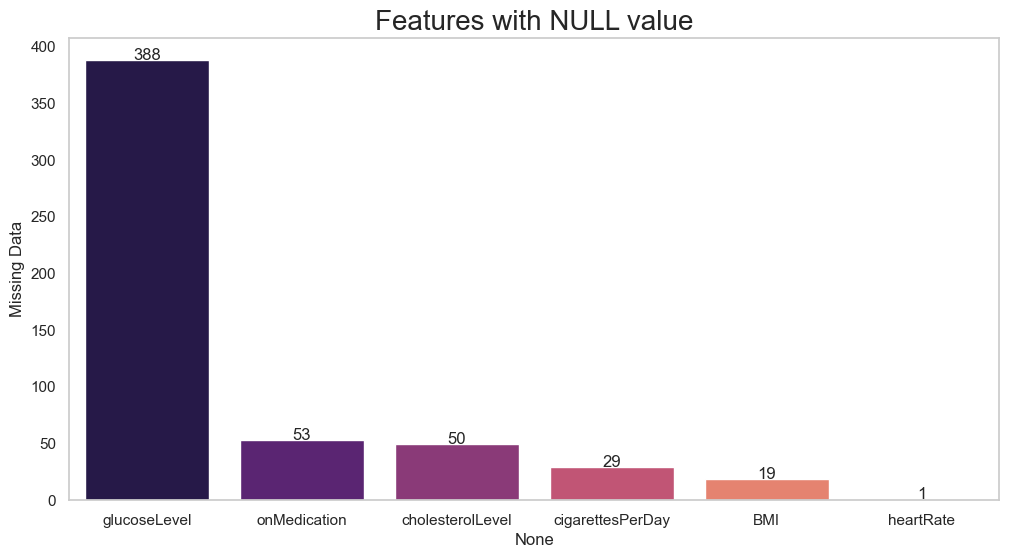

In [12]:
fig = plt.figure(figsize = (12,6))
sns.set(style = "whitegrid")
ax = sns.barplot(x = missing_data.index, y = missing_data["Missing Data"], data = missing_data, palette = "magma")

for i in range(len(missing_data.index)):
    plt.text(i, missing_data["Missing Data"][i], missing_data["Missing Data"][i], ha = "center")

ax.grid(False)
plt.title("Features with NULL value", fontsize = 20)
plt.show()

> The *glucoseLevel* field contains 388 (9,15%) null values. There are also some other few missing entries.  
> Since the total missing entries are not bigger than 12% as nr of rows, ***they will be dropped***.  
> Their removal won't impact the model training.

In [14]:
data.dropna(axis = 0, inplace = True)
data.shape

(3751, 15)

## 1.3. Data Distribution  
Check what features are strong balanced or weak balanced.

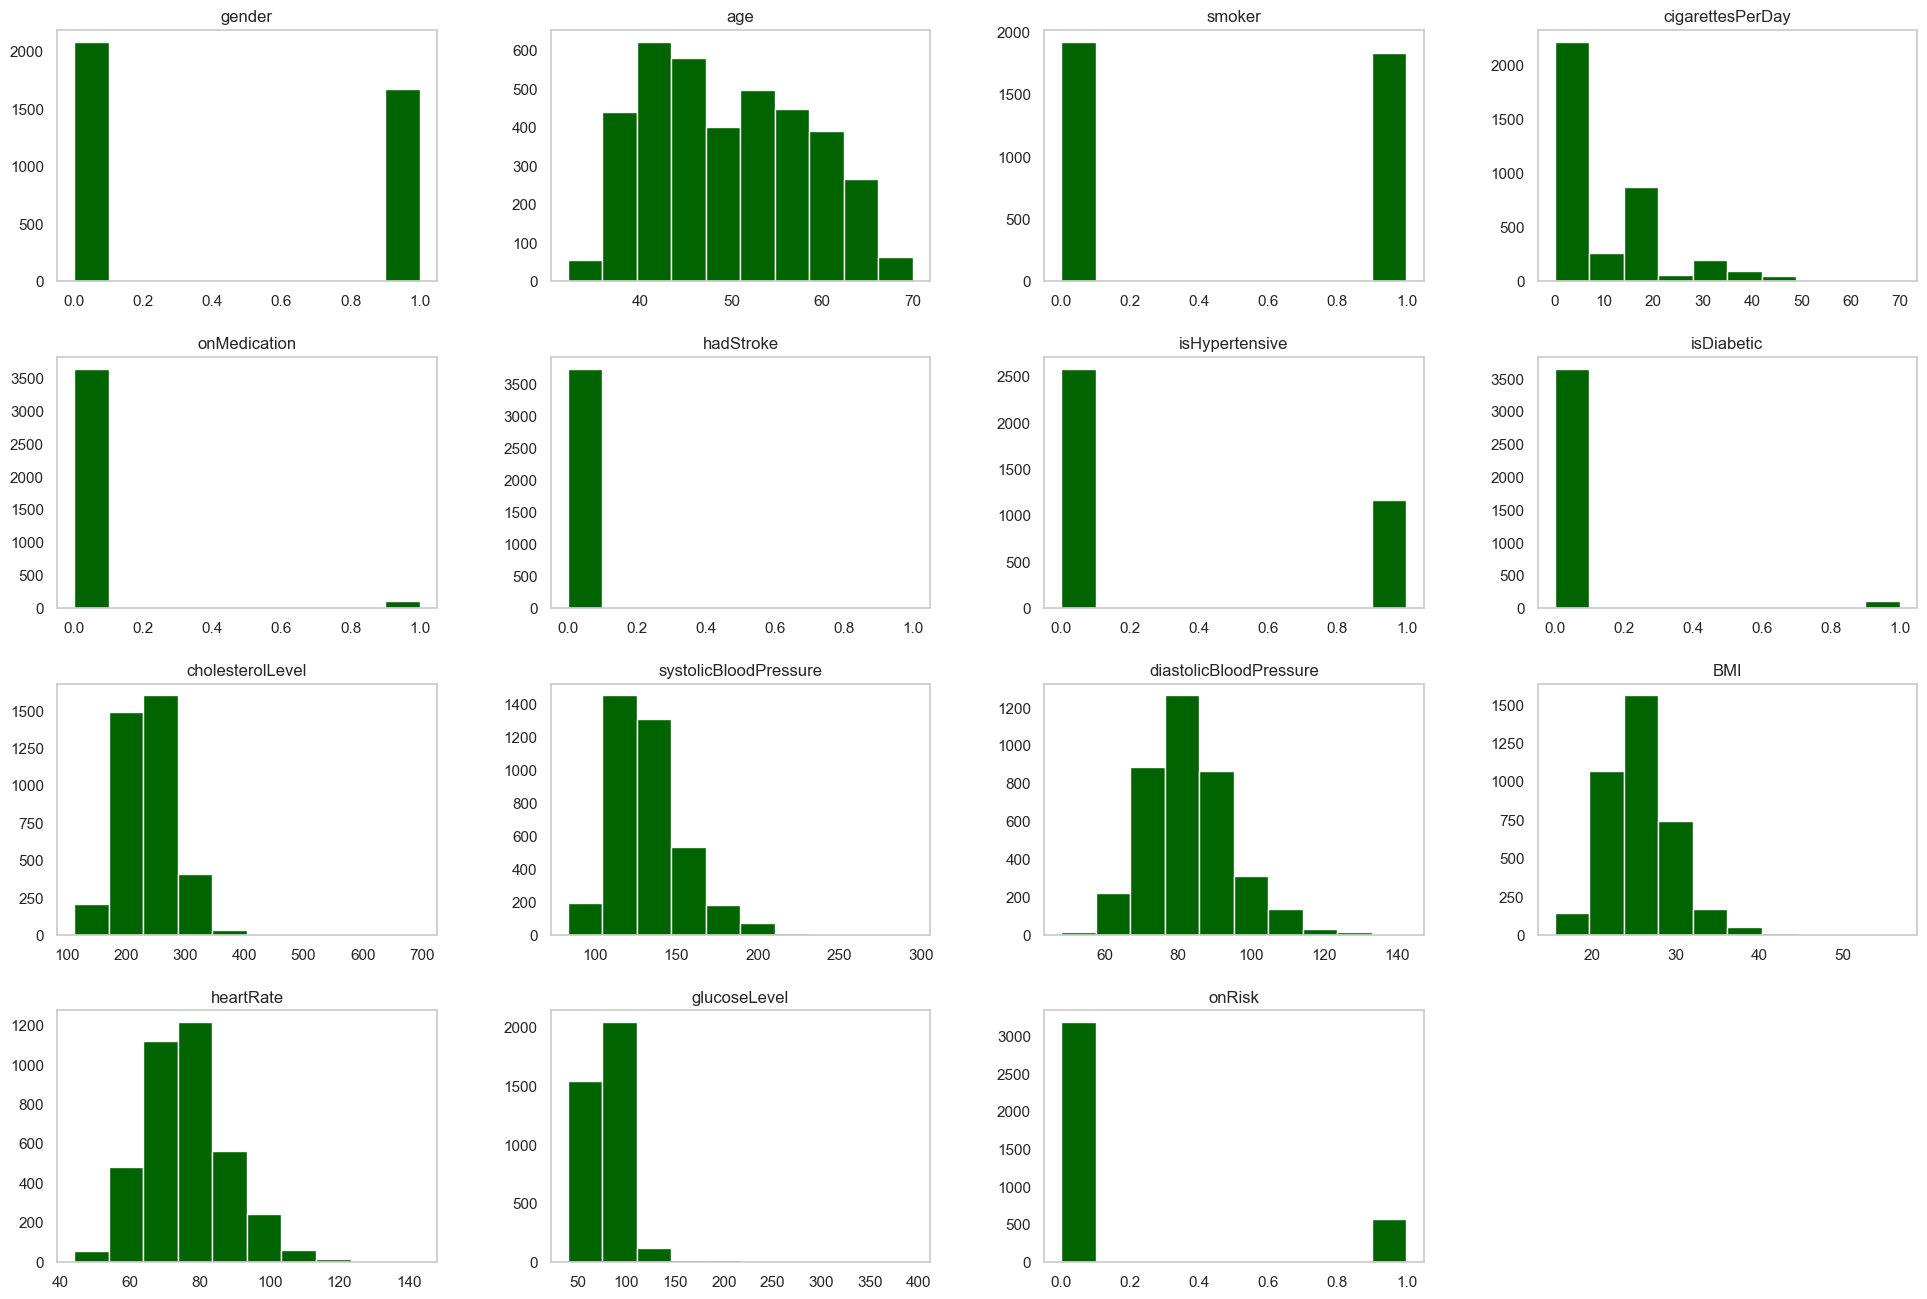

In [16]:
fig = plt.figure(figsize = (24,16))
ax = fig.gca()
data.hist(ax = ax, grid = False, color = "darkgreen")
plt.show()

**First Conclusion**  
We can observe that **onMedication**, **isDiabetic** and **hadStroke** are poorly balanced.  
All other fields are normally balanced.

### 1.3.1. Distribution of Heart Attack cases  
***

In [19]:
from collections import Counter

# ---------------------------------------------------------------------------------------
def displayBarPlot(labels, sp_x, sp_y, pos, data, title, show_val=True, ylim=(0, 0)):
    plt.subplot(sp_x, sp_y, pos)
    sns.set(style="whitegrid")
    ax = sns.barplot(x=labels, y=list(data.values()), palette='prism')
    plt.title(title, fontsize=20)
    
    if ylim != (0, 0):
        ax.set(ylim=ylim)
    
    if show_val:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x() + 0.35, p.get_height() + 20), fontsize=12)
# ---------------------------------------------------------------------------------------
def displayCountPlot(figsize, x, data, hue=None, title=None, show_val=False, palette="prism"):
    fig = plt.figure(figsize=figsize)
    sns.set(style="whitegrid")
    ax = sns.countplot(x=x, data=data, hue=hue, palette=palette)
    plt.title(title, fontsize=20)
    plt.legend(loc="upper right")
    
    if show_val:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x() + 0.2, p.get_height() + 0.15), fontsize=12)
    
    plt.show()

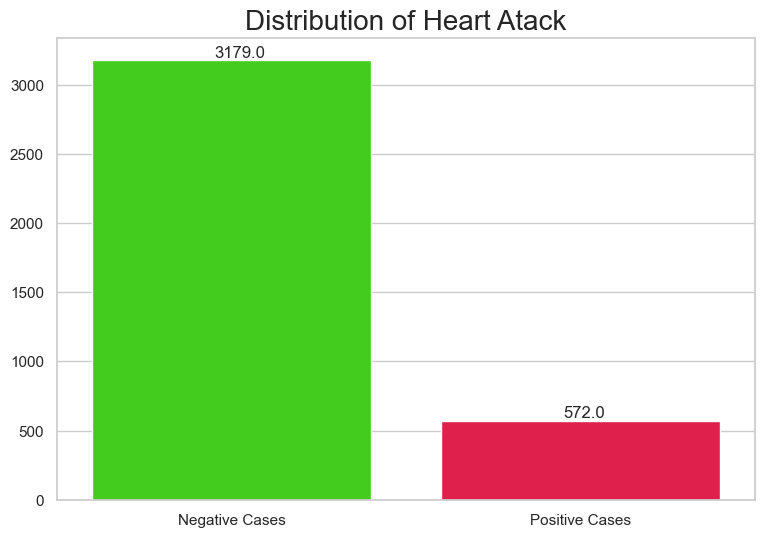

In [20]:
# Get count by onRisk
y = data.iloc[:, -1]
num = dict(Counter(y))

labels = ["Negative Cases", "Positive Cases"]
plt.figure(figsize = (9,6))
displayBarPlot(labels, 1, 1, 1, num, title = "Distribution of Heart Atack")

### 1.3.2. Distribution of Heart Attack cases per Age  
***

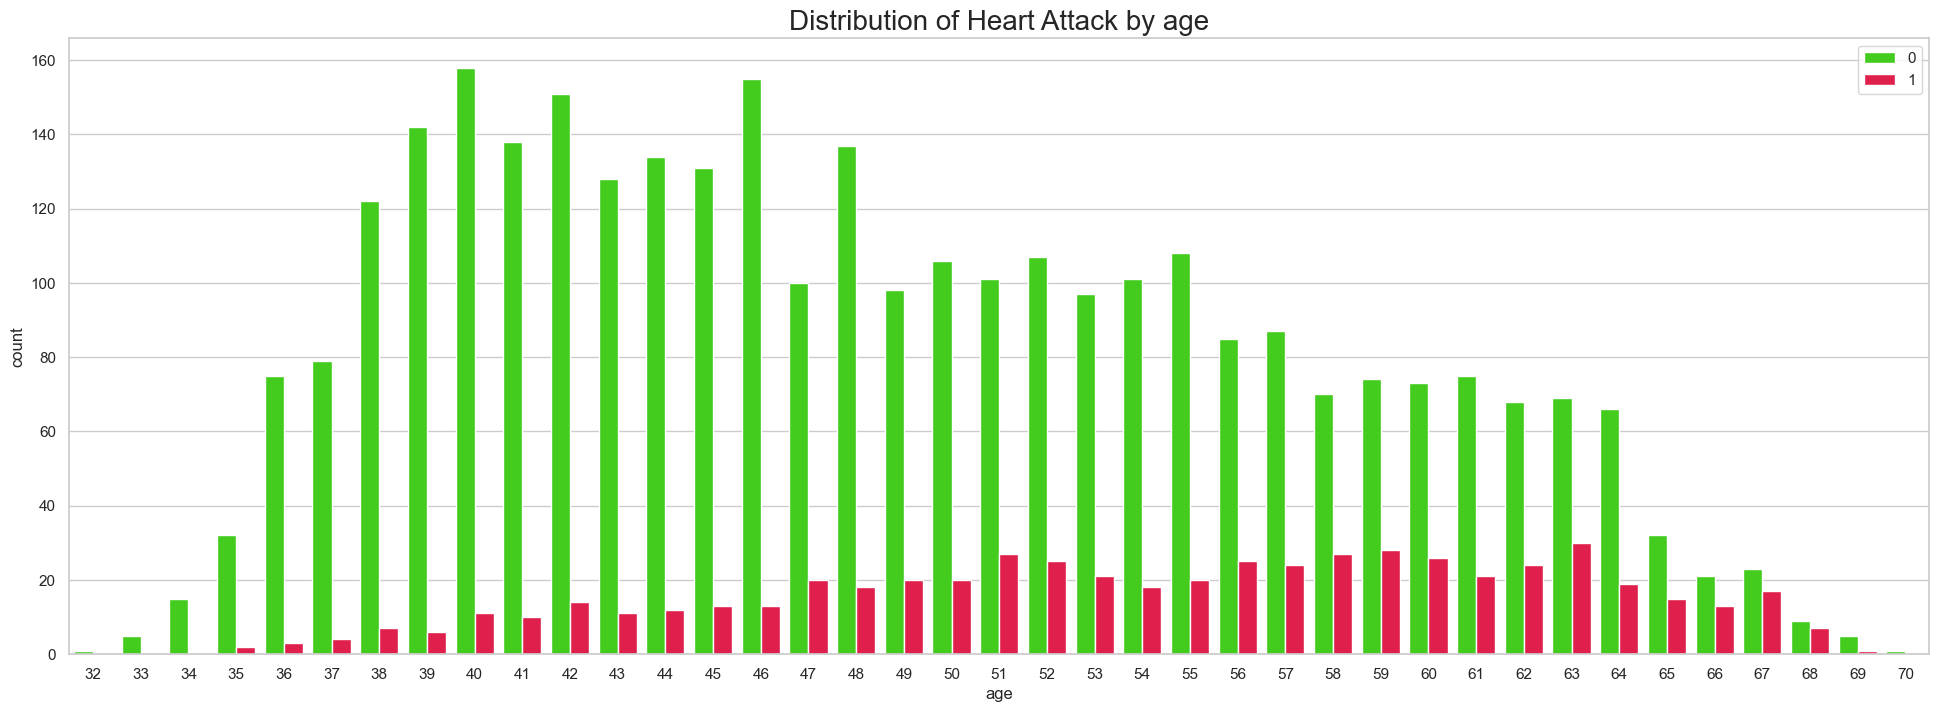

In [22]:
displayCountPlot(figsize = (24, 8), x = "age", data = data, hue = "onRisk", title = "Distribution of Heart Attack by age")

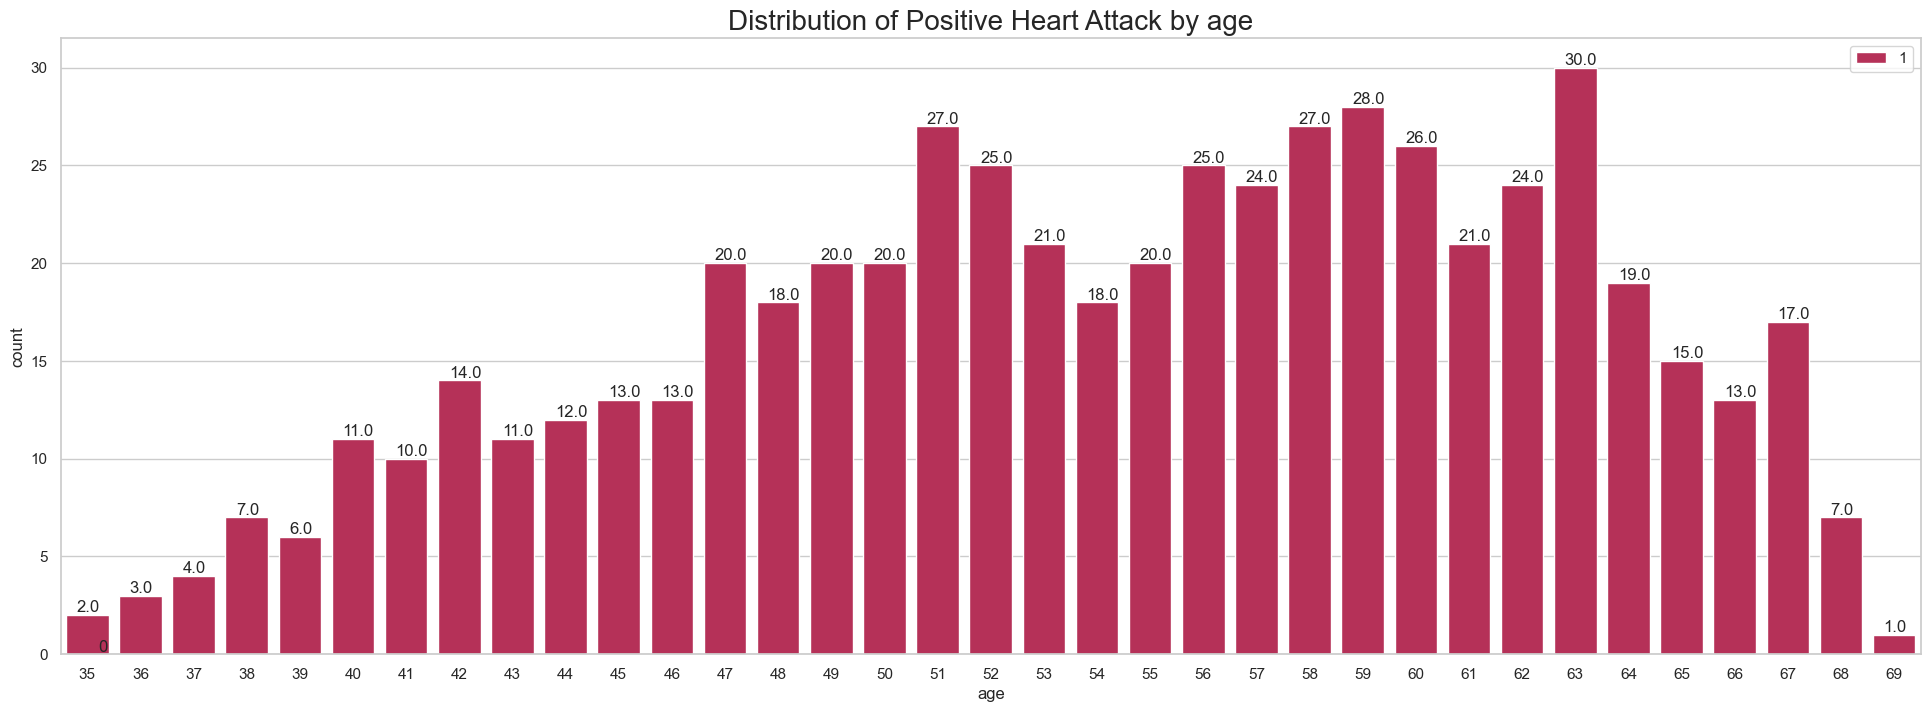

In [23]:
positive_cases = data[data["onRisk"] == 1]
displayCountPlot(figsize = (24, 8), x = "age", data = positive_cases, hue = "onRisk", title = "Distribution of Positive Heart Attack by age", show_val = True, palette = "rocket")

This analysis shows that thye people with higher risk of heart attack are the ones with ages between 51 and 63. Moreover we can observe an increasing trend of sick people once the age increases as well.
***

Lets check now the distribution of the heart attacks by main categorical variables:  
- Distribution by Gender (Male/Female)
- Distribution by Smoker/Non-Smoker
- Distribution by Diabetic/Non-Diabetic
- Distribution by Blood Pressure Medication
- Distribution by Hypertensive/Non-Hypertensive

In [26]:
def displayStackBar(dataset, title = None, xLabel = None, yLabel = None, show_yticks = True):
    default_colors = ["#2e8b57", "#dc143c", "#4682b4"]
    
    
    # Get percent from total values
    totals = dataset.sum(axis = 1)
    bars = ((dataset.T / totals) * 100).T
    r = list(range(dataset.index.size))
    
    
    # Establish coordonates
    barwidth = 0.95
    names = dataset.index.tolist()
    bottom = [0]*bars.shape[0]
    
    
    # Prepare the stackbars
    color_index = 0
    plots = []
    
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom = bottom, color = default_colors[color_index], edgecolor = "white", width = barwidth))
        bottom = list(map(add, bottom, bars[bar]))
        if color_index >= len(default_colors):
            color_index = 0
        else:
            color_index = color_index + 1
    
    
    # Draw
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel("" if xLabel is None else xLabel, fontdict = dict(color = "black", size = 14))
    plt.ylabel("" if yLabel is None else yLabel, fontdict = dict(color = "black", size = 14))
    ax = plt.gca()
    
    y_labels = ax.get_yticks()
    if show_yticks is True:
        ax.set_yticklabels([str(y) + "%" for y in y_labels])
    else:
        ax.set_yticklabels("")
        
    flat_list = [item for sublist in dataset.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + "\n(" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment = "center", verticalalignment = "center", fontdict = dict(color = "white", size = 14))
    
    for item in ([ax.title]):
        item.set_fontsize(20)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)
        

    ax.grid(False)
    legend = ax.legend(plots, bars.columns.tolist(), fancybox = True, loc = "right")
    plt.setp(legend.get_texts(), fontsize = '14')
    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def showDistribution(by = None, title = None, grid_rows = 1, grid_cols = 1, pos = 1, index0 = None, index1 = None, xLabel = None, yLabel = None, show_yticks = True):
    plt.subplot(grid_rows, grid_cols, pos)
    temp = data[[by, "onRisk"]].groupby([by, "onRisk"]).size().unstack("onRisk")
    temp.rename(index = {0: index0, 1: index1}, columns = {0: "No Heart Attack", 1: "Had Heart Attack"}, inplace = True)
    displayStackBar(temp, title = title, xLabel = xLabel, yLabel = yLabel, show_yticks = show_yticks)

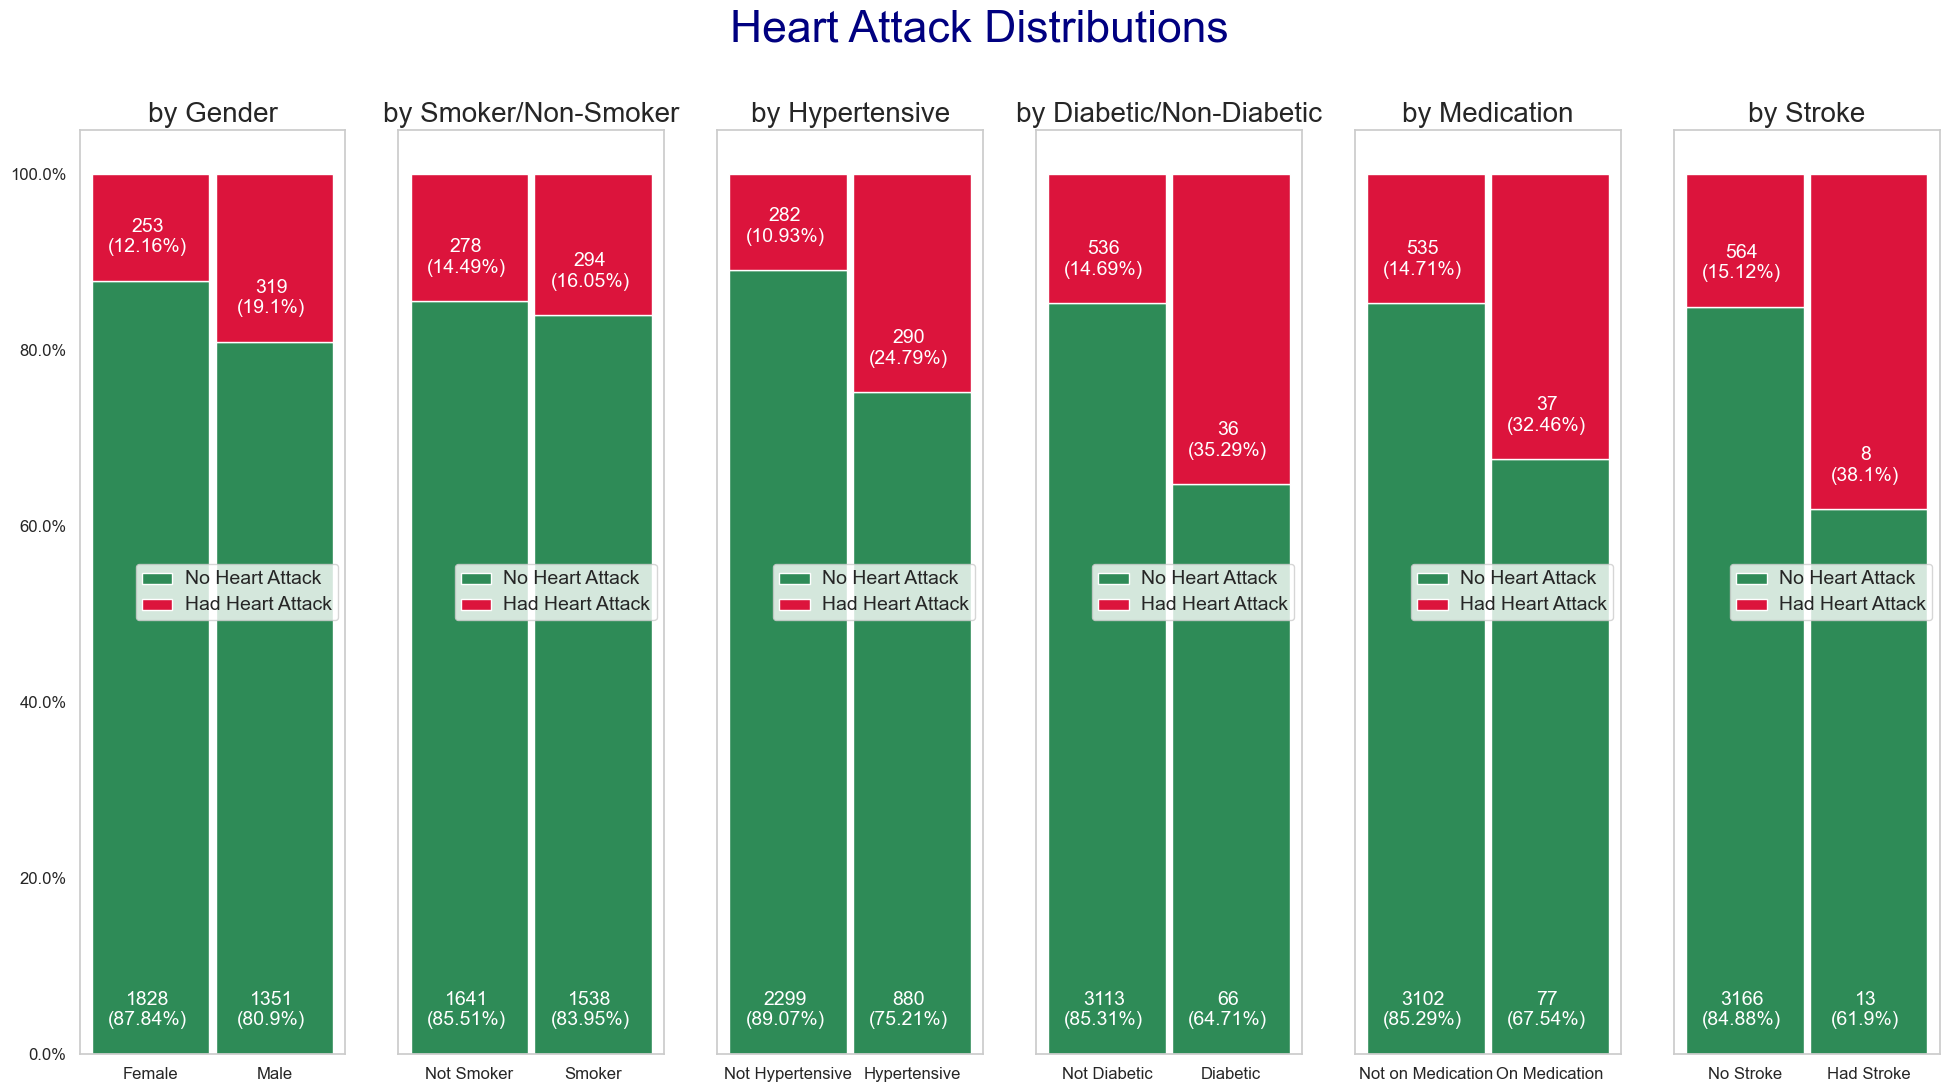

In [27]:
# Prepare SubPlots
fig = plt.figure(figsize = (24, 12))
grid_rows = 1
grid_cols = 6
fig.suptitle("Heart Attack Distributions", fontdict = dict(color = "navy"), fontsize = 32)

# Distribution by Gender
showDistribution(by = "gender", title = "by Gender", grid_rows = grid_rows, grid_cols = grid_cols, pos = 1, index0 = "Female", index1 = "Male", show_yticks = True)

# Distribution by Smoker
showDistribution(by = "smoker", title = "by Smoker/Non-Smoker", grid_rows = grid_rows, grid_cols = grid_cols, pos = 2, index0 = "Not Smoker", index1 = "Smoker", show_yticks = False)

# Distribution by Hypertensive
showDistribution(by = "isHypertensive", title = "by Hypertensive", grid_rows = grid_rows, grid_cols = grid_cols, pos = 3, index0 = "Not Hypertensive", index1 = "Hypertensive", show_yticks = False)

# Distribution by Diabetics
showDistribution(by = "isDiabetic", title = "by Diabetic/Non-Diabetic", grid_rows = grid_rows, grid_cols = grid_cols, pos = 4, index0 = "Not Diabetic", index1 = "Diabetic", show_yticks = False)

# Distribution by Medication
showDistribution(by = "onMedication", title = "by Medication", grid_rows = grid_rows, grid_cols = grid_cols, pos = 5, index0 = "Not on Medication", index1 = "On Medication", show_yticks = False)

# Distribution by Stroke
showDistribution(by = "hadStroke", title = "by Stroke", grid_rows = grid_rows, grid_cols = grid_cols, pos = 6, index0 = "No Stroke", index1 = "Had Stroke", show_yticks = False)

### 1.3.3. Correlation Heatmap
***
We have to check whether there are specific features strongly correlated with the risk of having a heart attack.  
Also, we'll check if there is any correlation between two independant features.

<Axes: >

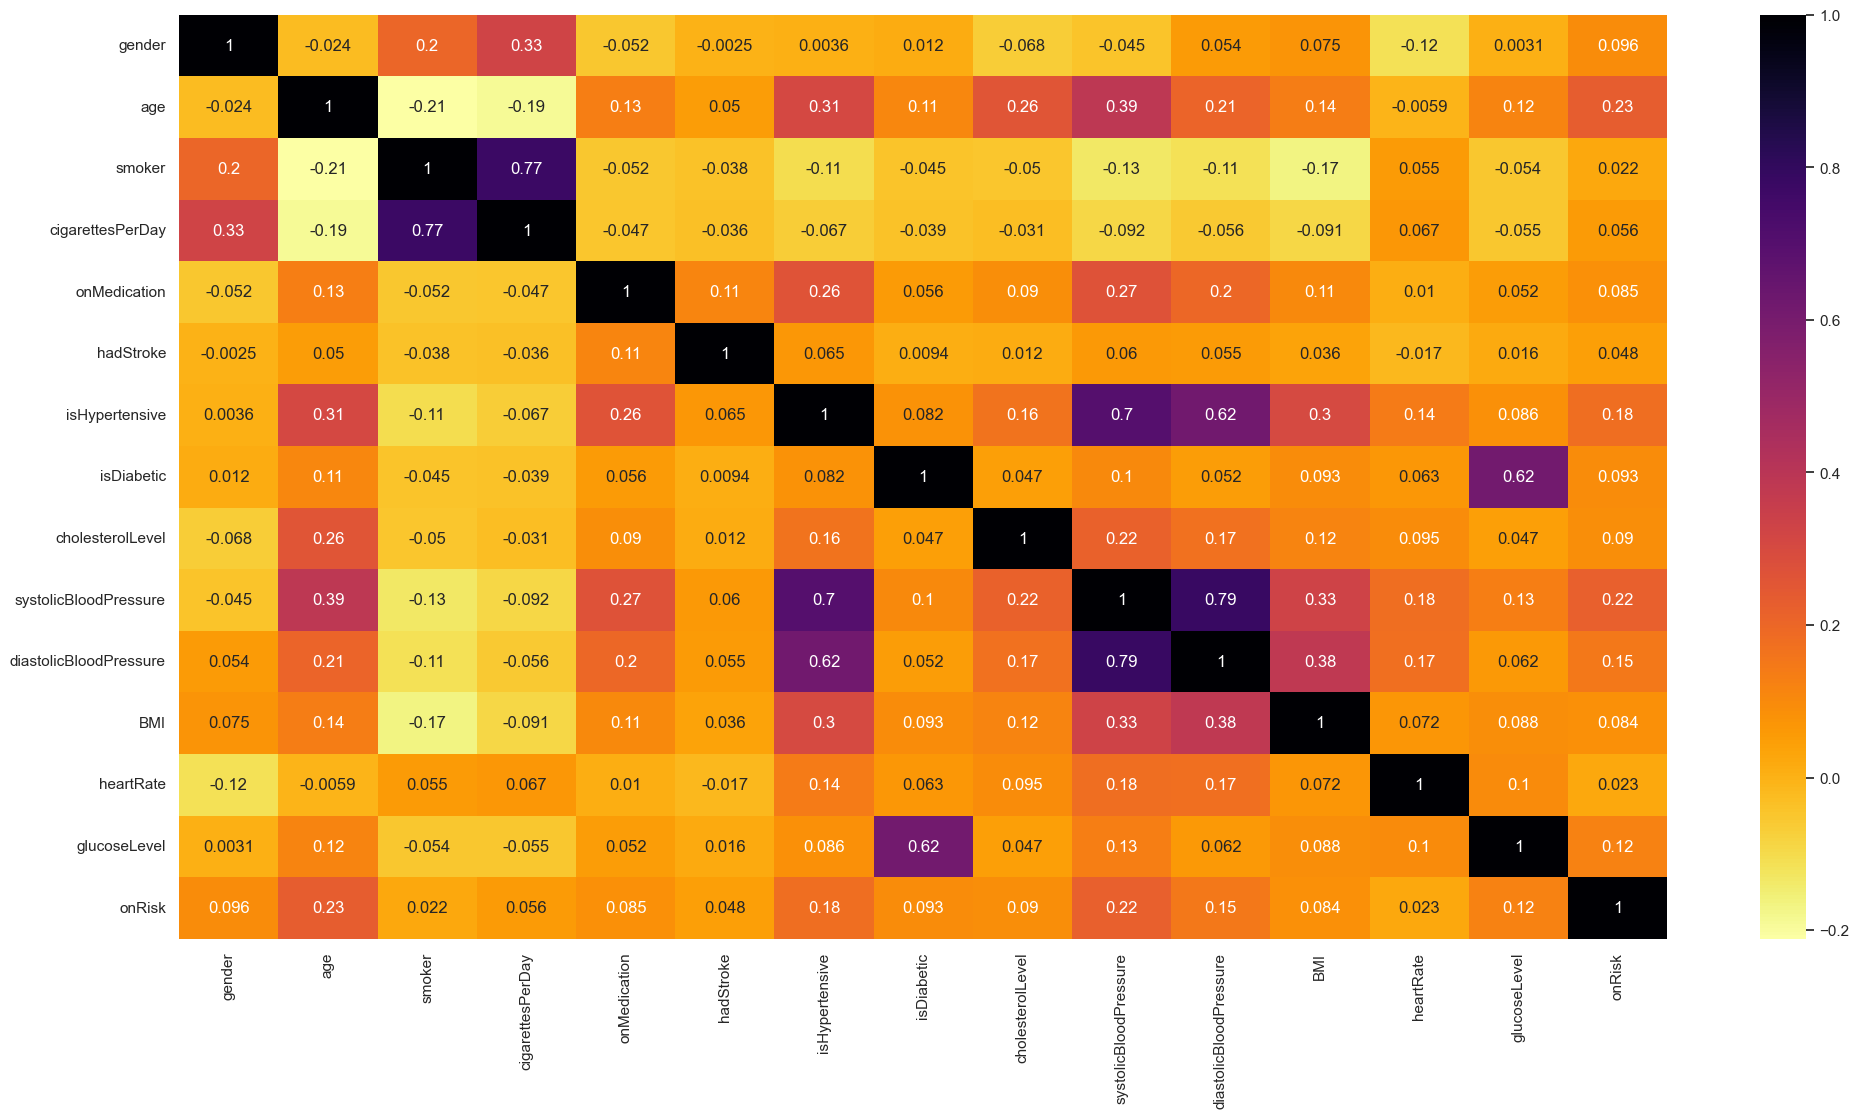

In [29]:
plt.figure(figsize = (24,12))
sns.heatmap(data.corr(), annot = True, cmap = "inferno_r")

The biggest correlation with **onRisk** can be seen at **age** (0.23), **systolicBloodPressure** (0.22) and **isHypertensive** (0.18). However, the correlation index is quite small, therefore we can conclude that, individually, each feature leads to a poor prediction.  
Besides that, there are some features highly correlated with one another:
- systolicBloodPressure with diastolicBloodPressure: 0.79 (obviously they should be strongly correlated :))  
- smoker with cigarettesPerDay: 0.77  
- isHypertensive with systolicBloodPressure (0.7) and diastolicBloodPressure (0.62)
- isDiabetic with glucoseLevel: 0.62

## 1.4. Top Features  
### 1.4.1. Selection of the Top Features  
***
Based on correlation matrix, we will reduce the number of features as following: 
1. Patient Age
2. Number of Ciggarets Per Day
3. Level of Cholesterol
4. Systolic Blood Pressure
5. Diastolic Blood Pressure
6. Body Mass Index
7. Heart Rate
8. Glucose Level

In [32]:
top_features = ['age', 'cigarettesPerDay', 'cholesterolLevel', 'systolicBloodPressure', 'diastolicBloodPressure', 'BMI', 'heartRate', 'glucoseLevel']

### 1.4.2. Statistics of the Top Features  
***

In [34]:
import statsmodels.api as sm
X_top = data[top_features]
y = data.onRisk
result = sm.Logit(y, X_top).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414453
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 onRisk   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3743
Method:                           MLE   Df Model:                            7
Date:                Sat, 22 Feb 2025   Pseudo R-squ.:                 0.02940
Time:                        13:06:32   Log-Likelihood:                -1554.6
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 1.701e-17
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
age                        0.0248      0.006      4.404      0.000       0.014       0.036
cigarettesPerDay           0.0165      0.004      4.411      0.000       0.009       0.024
cholesterolLevel          -0.0031      0.001     -2.882      0.004      -0.005      -0.001
systolicBloodPressure      0.0256      0.003      7.696      0.000       0.019       0.032
diastolicBloodPressure    -0.0290      0.006     -4.911      0.000      -0.041      -0.017
BMI                       -0.0495      0.012     -4.124      0.000      -0.073      -0.026
heartRate                 -0.0329      0.004     -8.640      0.000      -0.040      -0.025
glucoseLevel               0.0044      0.002      2.685      0.007       0.001       0.008
==========================================================================================
"""

In [35]:
params = result.params
conf = result.conf_int()
conf["Probability Ratio"] = params
conf.columns = ["5%", "95%", "Ratio"]
np.exp(conf)

,5%,95%,Ratio
age,1.013859,1.036493,1.025114
cigarettesPerDay,1.009237,1.024188,1.016685
cholesterolLevel,0.994760,0.999000,0.996878
systolicBloodPressure,1.019284,1.032676,1.025958
diastolicBloodPressure,0.960190,0.982702,0.971381
BMI,0.929522,0.974338,0.951666
heartRate,0.960469,0.974902,0.967659
glucoseLevel,1.001189,1.007640,1.004409


The above statistic shows that *keeping all other features constant*, the chances of getting a heart attack increases with 2.5% for every increase of age and systolic blood pressure, and increases with 1% for every increase of number of ciggarettes smoked in a day.  
The other factors show no segnificant changes.

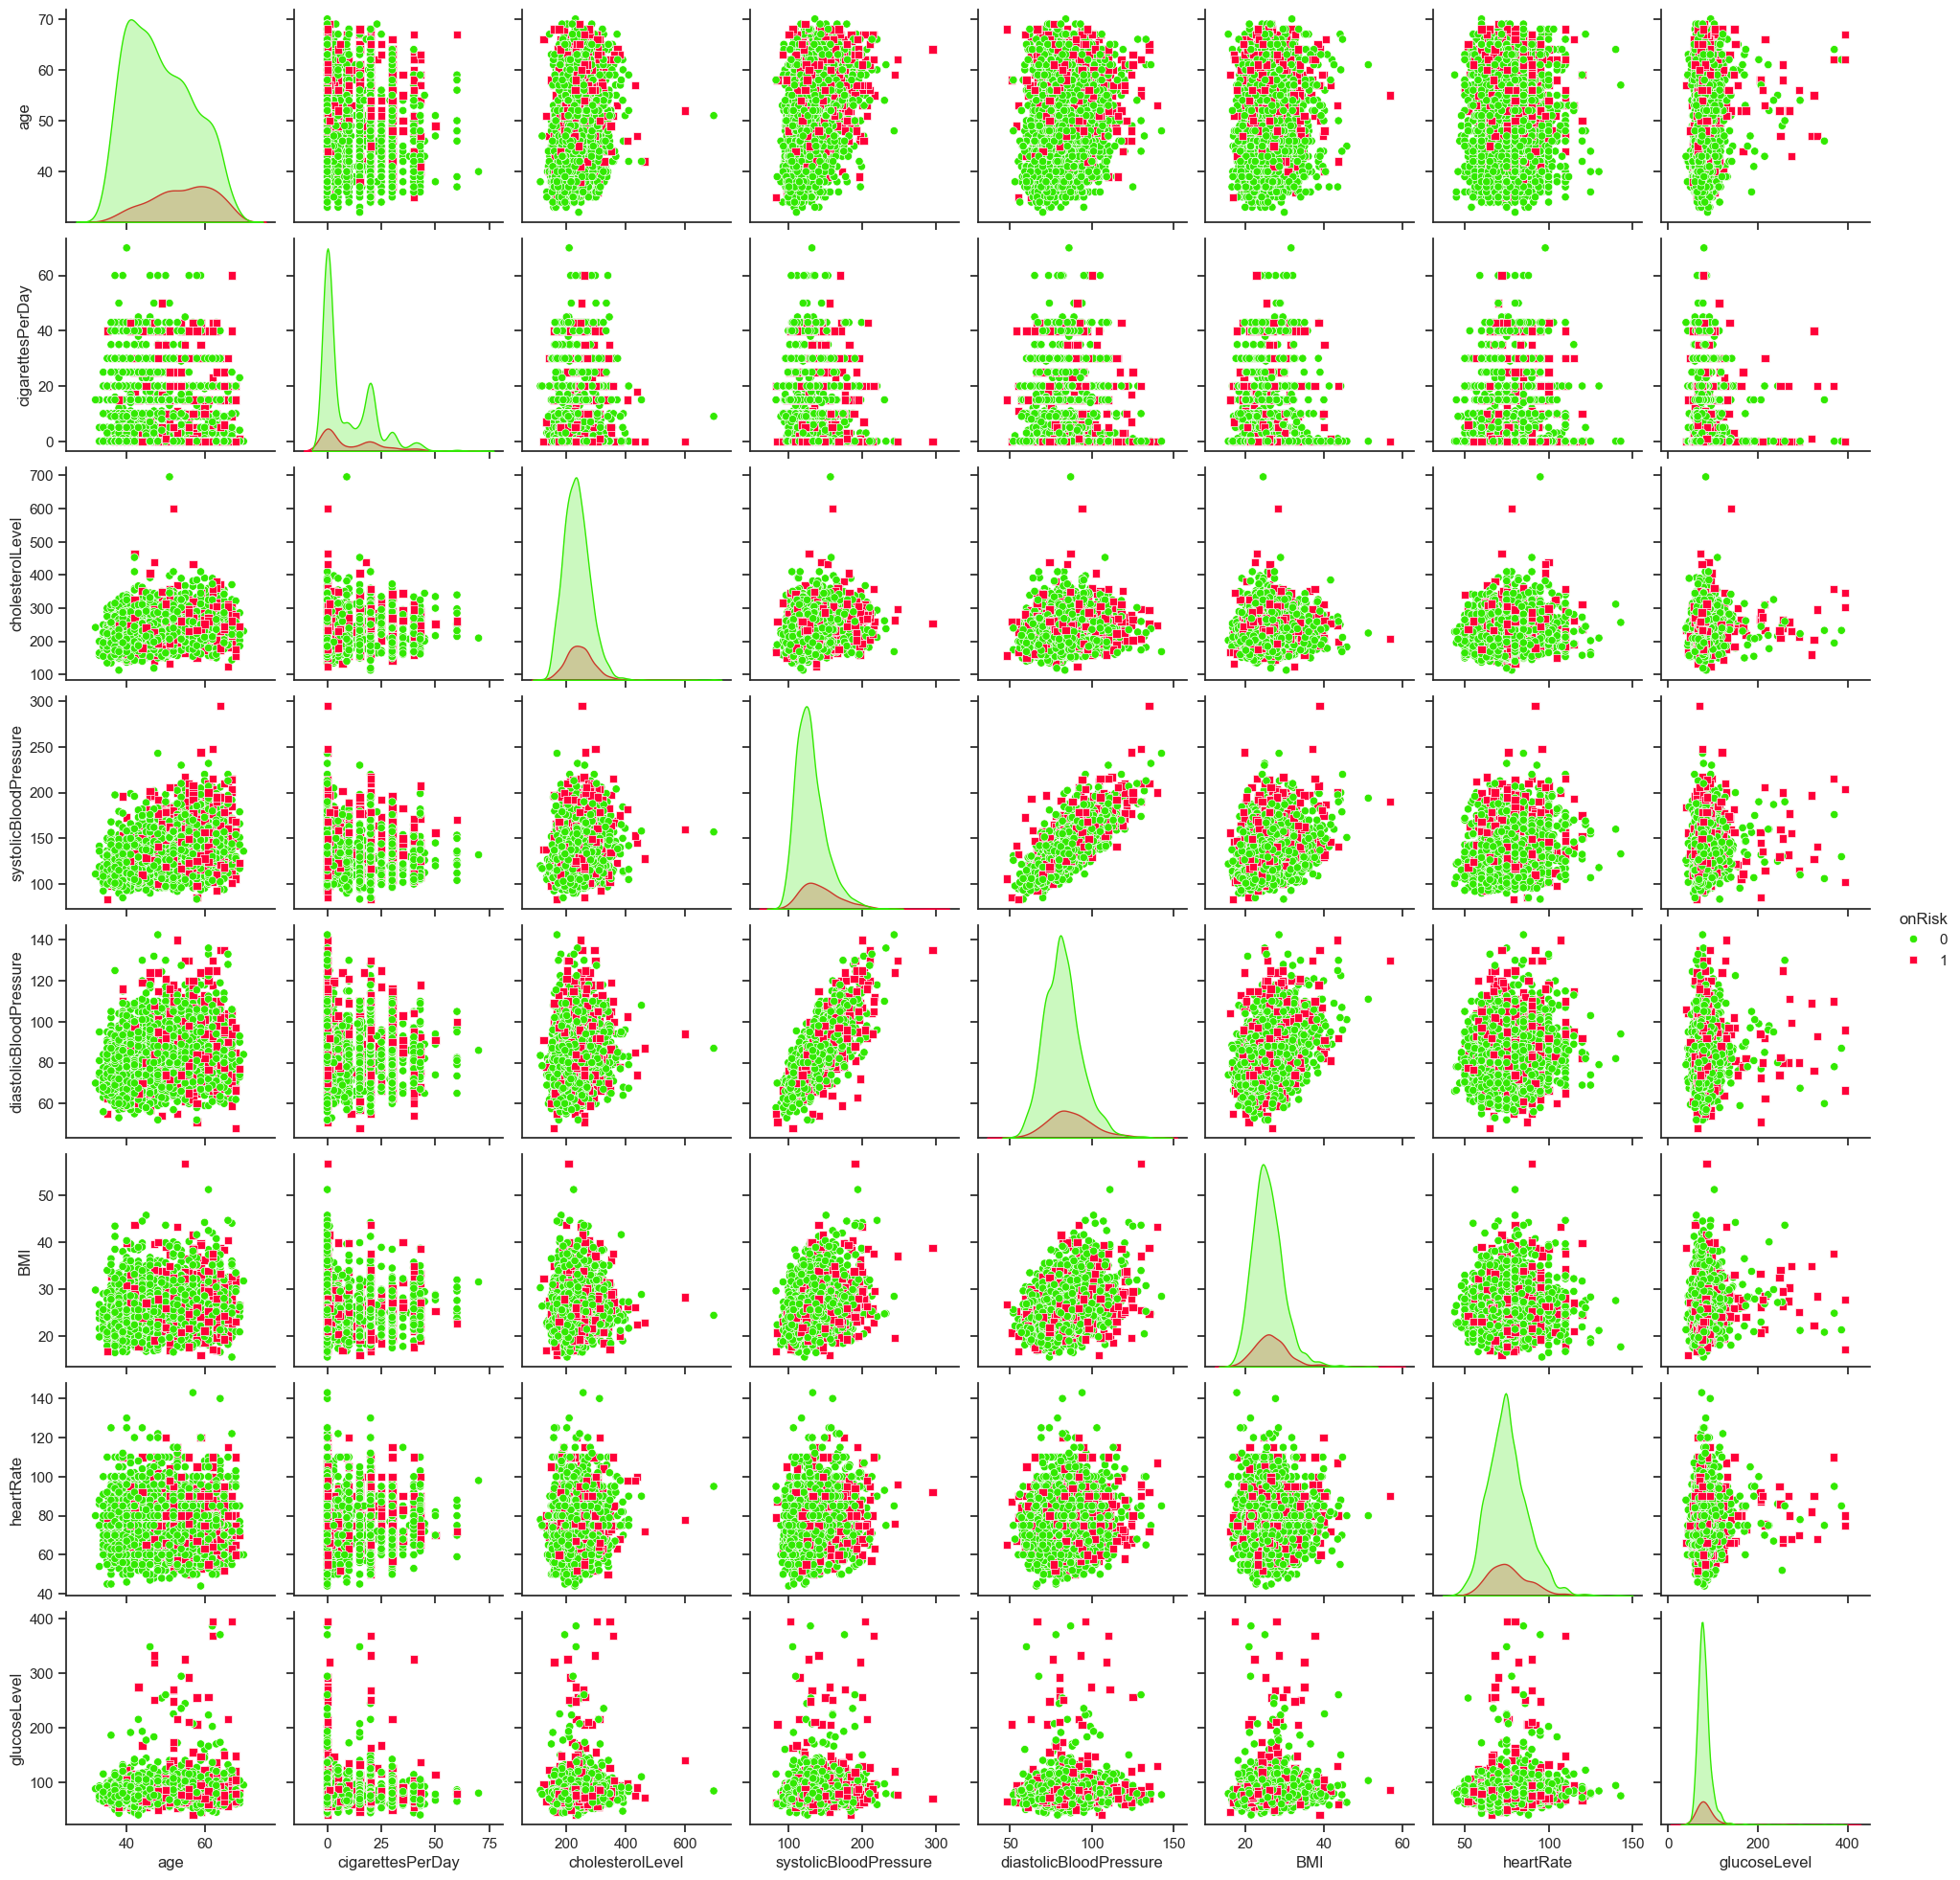

In [37]:
sns.set(style = "ticks", color_codes = True)
ax = sns.pairplot(data, hue = 'onRisk', markers = ['o', 's'], vars = top_features, palette = "prism")

As we can see there is no feature that splits the data properly.

# 2. Models and Prediction  
We saw above that the dataset is not properly balanced - we have 572 positive cases and 3179 negative cases, which means 1 to 6 ratio. Because of that, any trained algorithm might end up predicting mostly negative case, having a high accuracy, but a poor specificity.  
In order to avoid that we will balance the dataset using an oversampling technique called **Synthetic Minority Oversampling Technique (SMOTE)**. 

## 2.1. Balance Data by Oversampling  
The SMOTE algorithm randomly selects a minority class instance A and finds its K nearest minority class neighbors. Then it creates a synthetic instance B by ramdomly choosing one of the K nearest neighbors and connects A to B.  
All synthetic instances are generated as a combination of the 2 selacted instances A and B.  
*More details in **"Imbalanced Learning: Foundations, Algorithms and Applications, 2013"** or [SMOTE Imbalance Classification with Python](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).*

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X = data[top_features]
y = data.iloc[:, -1]

# numbers before SMOTE
num_before = dict(Counter(y))

# now, lets do SMOTE
over = SMOTE(sampling_strategy = 0.8)   #consider 80% from the data
under = RandomUnderSampler(sampling_strategy = 0.8)
pipeline_steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps = pipeline_steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)

# numbers after SMOTE
num_after = dict(Counter(y_smote))

print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


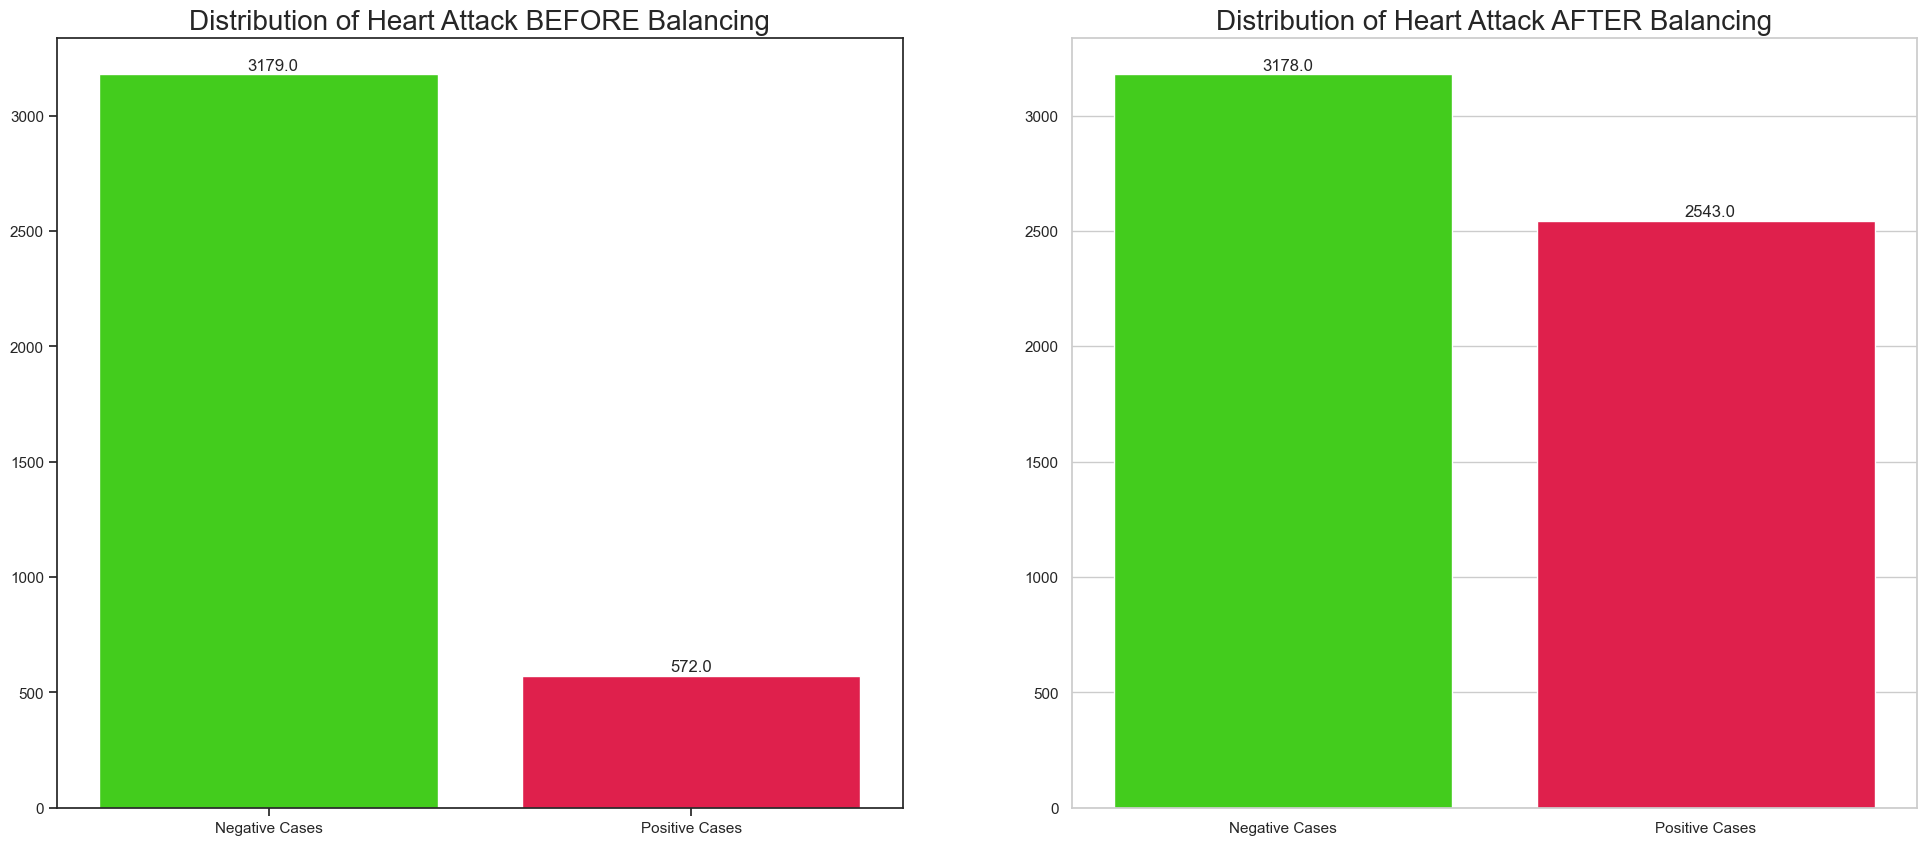

In [42]:
labels = ["Negative Cases", "Positive Cases"]
plt.figure(figsize = (24, 10))
displayBarPlot(labels, 1, 2, 1, num_before, "Distribution of Heart Attack BEFORE Balancing")
displayBarPlot(labels, 1, 2, 2, num_after, "Distribution of Heart Attack AFTER Balancing")

## 2.2. Split Balanced Data into Training and Target Data

In [44]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis = 1)
new_data.head()

,age,cigarettesPerDay,cholesterolLevel,systolicBloodPressure,diastolicBloodPressure,BMI,heartRate,glucoseLevel,onRisk
1253,63,0.0,276.0,144.0,90.0,21.35,70.0,78.0,0
3099,51,9.0,251.0,160.0,98.0,24.63,98.0,85.0,0
2251,40,0.0,178.0,119.0,78.5,23.28,72.0,75.0,0
3615,40,20.0,221.0,93.0,62.5,18.84,64.0,73.0,0
1918,53,0.0,279.0,132.0,81.0,26.18,67.0,77.0,0


In [45]:
X_new = new_data[top_features]
y_new = new_data.iloc[:, -1]

## 2.3. Feature Scaling  
This process ensures normalization of all features (aka. independatnt variables). Basically this is the process of preparation of variables for training.  
For this case, we will choose **Mean Normalization**(https://en.wikipedia.org/wiki/Feature_scaling)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

X_test.head()

,0,1,2,3,4,5,6,7
0,-1.917039,0.886112,-0.870826,-0.229062,0.189500,-0.546583,-0.432615,-0.487806
1,0.479456,-0.786717,2.047912,-0.354988,-0.050515,-1.242940,-0.519824,-0.276495
2,0.479456,-0.397503,1.000210,0.021809,0.015624,2.092626,-0.893371,-0.385203
3,-0.239492,-0.786717,-1.229384,-0.647514,-0.214243,-1.232593,-1.373002,-0.206058
4,-1.917039,-0.786717,0.198635,-1.236468,-0.930570,-1.379679,1.224359,-0.135621


## 2.4. Models  
We'll train  and test 3 models:
- Logistic Regression
- K-nearest Neighbors (KNN)
- Support Vector Machine (SVM)  

The overall purpose is to check which model better predicts the probability of the risk of heart attack (0 or 1).  
We will establish the better predictor by analyzing the Confussion Matrix:
- True Positive (TP)
- True Negative (TN)
- False Positive (FP)
- False Negative (FN)  

Based on them, there are 4 indicators that allow us to conclude the best prediction model.  

| Index  | Formula  | Description  |
|:-----|:-----:|:-------|
|**Accuracy**| ACC = (TP + TN) / (TP + TN + FP + FN) | Meaning: There is **ACC %** risk of heart attack.|
|**Recall**| TPR = TP / (TP + FN) | **True positive rate** Meaning: It correctly identifies **TPR %** of all heart attack risks.|
|**Precission**| P = TP / (TP + FP) | Meaning: When it predicts a risk, it is correct **P %** of the time.|
|**F1-Score**| F1 = TP / (TP + (FP + FN) / 2) | The harmonic mean of precission and recall.|

In [49]:
# define a generic calss for training and prediction

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from datetime import datetime

class ModelPrediction:
    
    # Constructor: initializes the classifier self variable, according to specified model -----------------------------------------
    def __init__ (self, X_train, y_train, X_test, y_test, model_type = "logistic-regression"):
        if model_type == "logistic-regression":
            params = { "penalty" : ['l1', 'l2'], "C" : [0.01, 0.1, 1, 10, 100], "class_weight" : ["balanced", None] }
            self.classifier = GridSearchCV(LogisticRegression(), param_grid = params, cv = 10)
        elif model_type == "knn":
            params = { "n_neighbors" : np.arange(1, 10) }
            grid_search = GridSearchCV(KNeighborsClassifier(), param_grid = params, scoring = 'accuracy', cv = 10, n_jobs = -1)
            self.classifier = GridSearchCV(KNeighborsClassifier(), param_grid = params, cv = 3, n_jobs = -1)
        elif model_type == "support-vector-machine":
            params = { "C" : [0.001, 0.01, 0.1, 1, 10], "gamma" : [0.001, 0.01, 0.1, 1] }
            self.classifier = GridSearchCV(SVC(kernel = "rbf", probability = True), param_grid = params, cv = 10)
            
        # Train and predict
        self.train(X_train, y_train)
        self.predict (X_test)
        
        # Get classifier results
        self.accuracy = accuracy_score(y_test, self.predict)
        self.recall = recall_score(y_test, self.predict)
        self.precision = precision_score(y_test, self.predict)
        self.f1 = f1_score(y_test, self.predict)
        self.cm = confusion_matrix(y_test, self.predict)
        self.cr = classification_report(y_test, self.predict)
        
        
    # -------------------------------------------------------------------------------------------------------------------------------
    def train (self, X_train, y_train):
        t1 = datetime.now()
        print("[{t1}] Start training...".format(t1 = t1))
        self.classifier.fit(X_train, y_train)
        t2 = datetime.now()
        diff = (t2 - t1).total_seconds()
        print("[{t2}] End training. This process took {diff} seconds".format(t2 = t2, diff = diff))
        
    # -------------------------------------------------------------------------------------------------------------------------------
    def predict (self, X_test):
        t1 = datetime.now()
        print("[{t1}] Start predicting...".format(t1 = t1))
        self.predict = self.classifier.predict(X_test)
        t2 = datetime.now()
        diff = (t2 - t1).total_seconds()
        print("[{t2}] End predicting. This process took {diff} seconds".format(t2 = t2, diff = diff))

In [50]:
def PredictAndPrintConfusionMatrix (model_type = None):
    model = ModelPrediction(X_train, y_train, X_test, y_test, model_type = model_type)
    
    cm = pd.DataFrame(data = model.cm, columns = ["Predicted: False", "Predicted: True"], index = ["Actual: False", "Actual: True"])
    plt.figure(figsize = (14, 8))
    sns.heatmap(cm, annot = True, fmt = "d")
    plt.show()
    
    print(" Accuracy   = " + str(round(model.accuracy * 100, 2)) + "%")
    print(" Precision  = " + str(round(model.precision * 100, 2)) + "%")
    print(" Recall     = " + str(round(model.recall * 100, 2)) + "%")
    print(" F1-score   = " + str(round(model.f1 * 100, 2)) + "%")
    print("\n")
    
    return model

### 2.4.1. Logistic Regression  
--- 

Logistic regression is an extremly efficient machanism for calculating probabilities. It is represented by a sigmoid function:  
![Sigmoid](Pics/SigmoidFunction.png)  
![Sigmoid](Pics/sigmoid.png)  

Reference: https://developers.google.com/machine-learning/crash-course/logistic-regression/video-lecture 

[2025-02-22 13:06:43.076634] Start training...
[2025-02-22 13:06:43.955385] End training. This process took 0.878751 seconds
[2025-02-22 13:06:43.955475] Start predicting...
[2025-02-22 13:06:43.956363] End predicting. This process took 0.000888 seconds


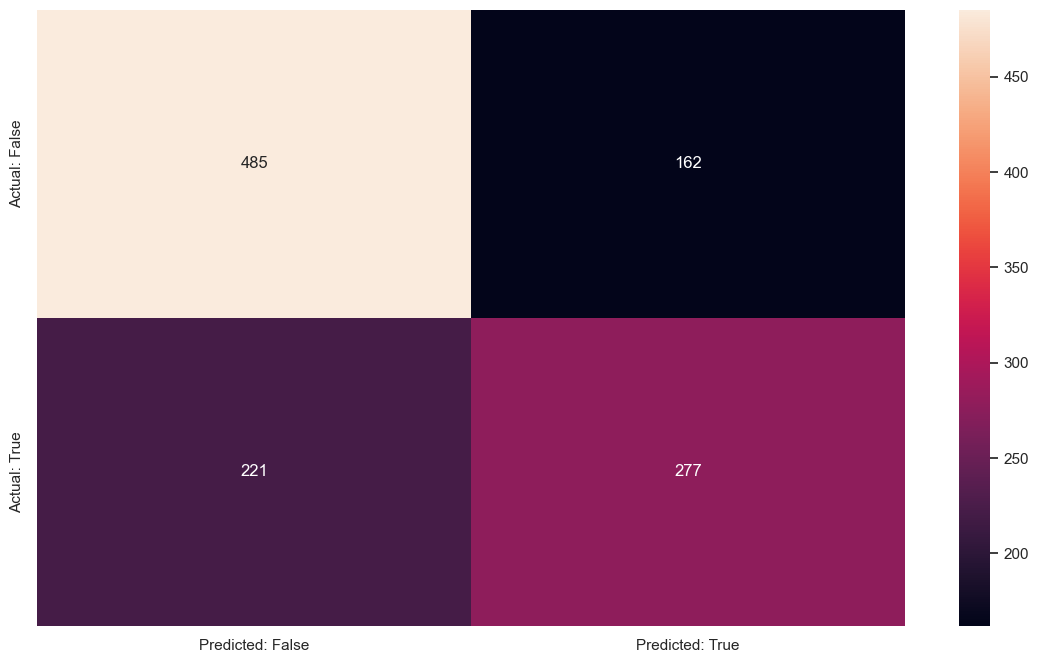

 Accuracy   = 66.55%
 Precision  = 63.1%
 Recall     = 55.62%
 F1-score   = 59.12%




In [52]:
lr = PredictAndPrintConfusionMatrix(model_type = "logistic-regression")

### 2.4.2. K-Nearest Neighbors  
---  
This k-nearest neighbors algorythm (knn) is a non-parametric classifiction where the input consists of the k closest training examples in the data set. The output depends on how knn is used - for classifiction or for regression:  
- In *knn classification*, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
- In *knn regression*, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

In our case, there is a knn classification. The algorythm works as below:  

![KNN](Pics/KnnClassification.png)  

The test sample (green dot) should be classified either to blue squares or to red triangles.   
- If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. 
- If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).  

Reference: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

[2025-02-22 13:06:44.139251] Start training...
[2025-02-22 13:06:45.379697] End training. This process took 1.240446 seconds
[2025-02-22 13:06:45.379803] Start predicting...
[2025-02-22 13:06:45.403690] End predicting. This process took 0.023887 seconds


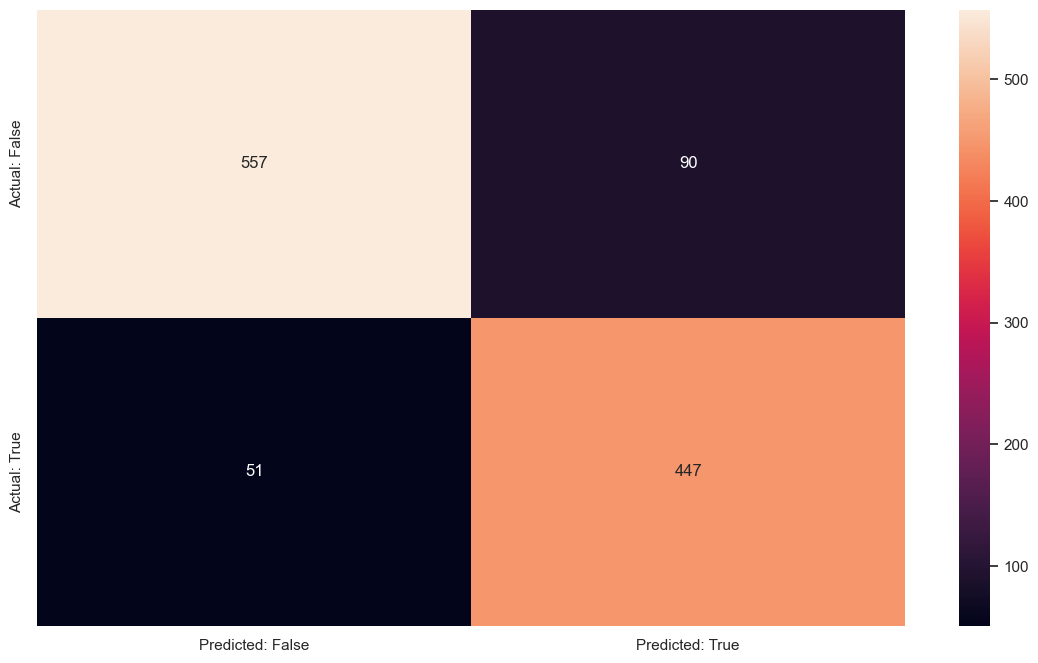

 Accuracy   = 87.69%
 Precision  = 83.24%
 Recall     = 89.76%
 F1-score   = 86.38%




In [54]:
knn = PredictAndPrintConfusionMatrix(model_type = "knn")

### 2.4.3.Support Vector Machine
--- 
The objective of the support vector machine (SVM) algorithm is to find a hyperplane in an N-dimensional space (N = the number of features) that distinctly classifies the data points.    
In a two-dimensional representation (2 features), the hyperplane is the line creating the margin between them:  
![SVM](Pics/SVM.png)  

Maximum-margin hyperplane and margins for an SVM trained with samples from two classes. Samples on the margin are called the support vectors.

References: https://en.wikipedia.org/wiki/Support-vector_machine  
            https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

[2025-02-22 13:06:45.562319] Start training...
[2025-02-22 13:10:25.874592] End training. This process took 220.312273 seconds
[2025-02-22 13:10:25.874667] Start predicting...
[2025-02-22 13:10:25.950154] End predicting. This process took 0.075487 seconds


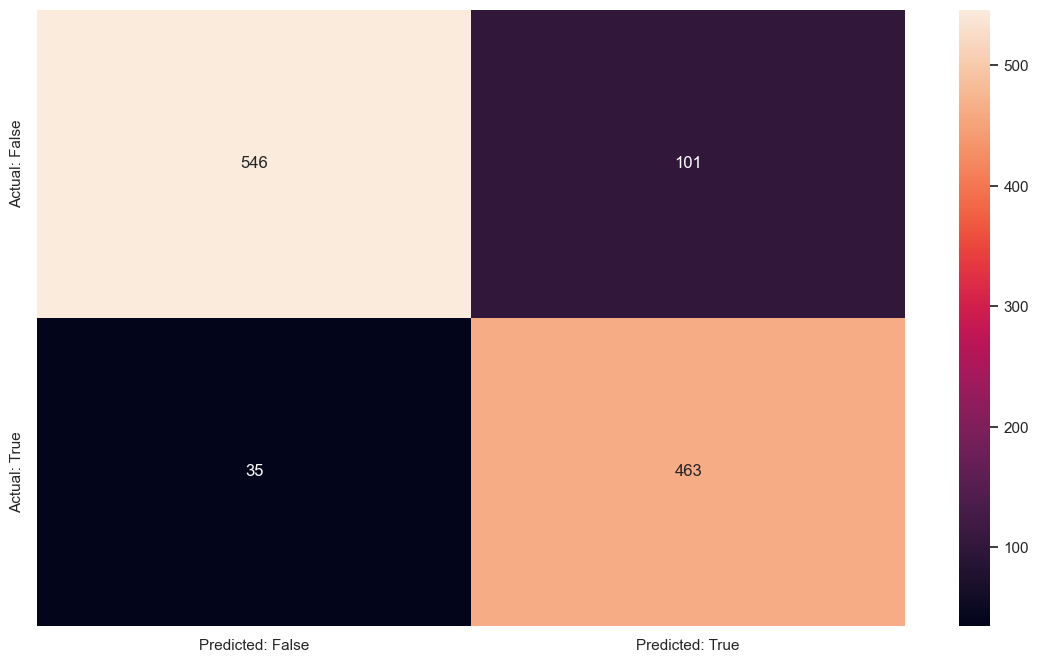

 Accuracy   = 88.12%
 Precision  = 82.09%
 Recall     = 92.97%
 F1-score   = 87.19%




In [56]:
svm = PredictAndPrintConfusionMatrix(model_type = "support-vector-machine")

## 2.5. Comparing Results  

Let's look at the four indicators for each model and analyze which fits better into this sample set.

In [58]:
comp = pd.DataFrame (
    {
        "Logistic Regression" : {"Accuracy": lr.accuracy, "Precission": lr.precision, "Recall": lr.recall, "F1-score": lr.f1},
        "K-Nearest Neighbors" : {"Accuracy": knn.accuracy, "Precission": knn.precision, "Recall": knn.recall, "F1-score": knn.f1},
        "Support Vector Machine" : {"Accuracy": svm.accuracy, "Precission": svm.precision, "Recall": svm.recall, "F1-score": svm.f1}
    }
)
comp

,Logistic Regression,K-Nearest Neighbors,Support Vector Machine
Accuracy,0.665502,0.876856,0.881223
Precission,0.630979,0.832402,0.820922
Recall,0.556225,0.897590,0.929719
F1-score,0.591249,0.863768,0.871940


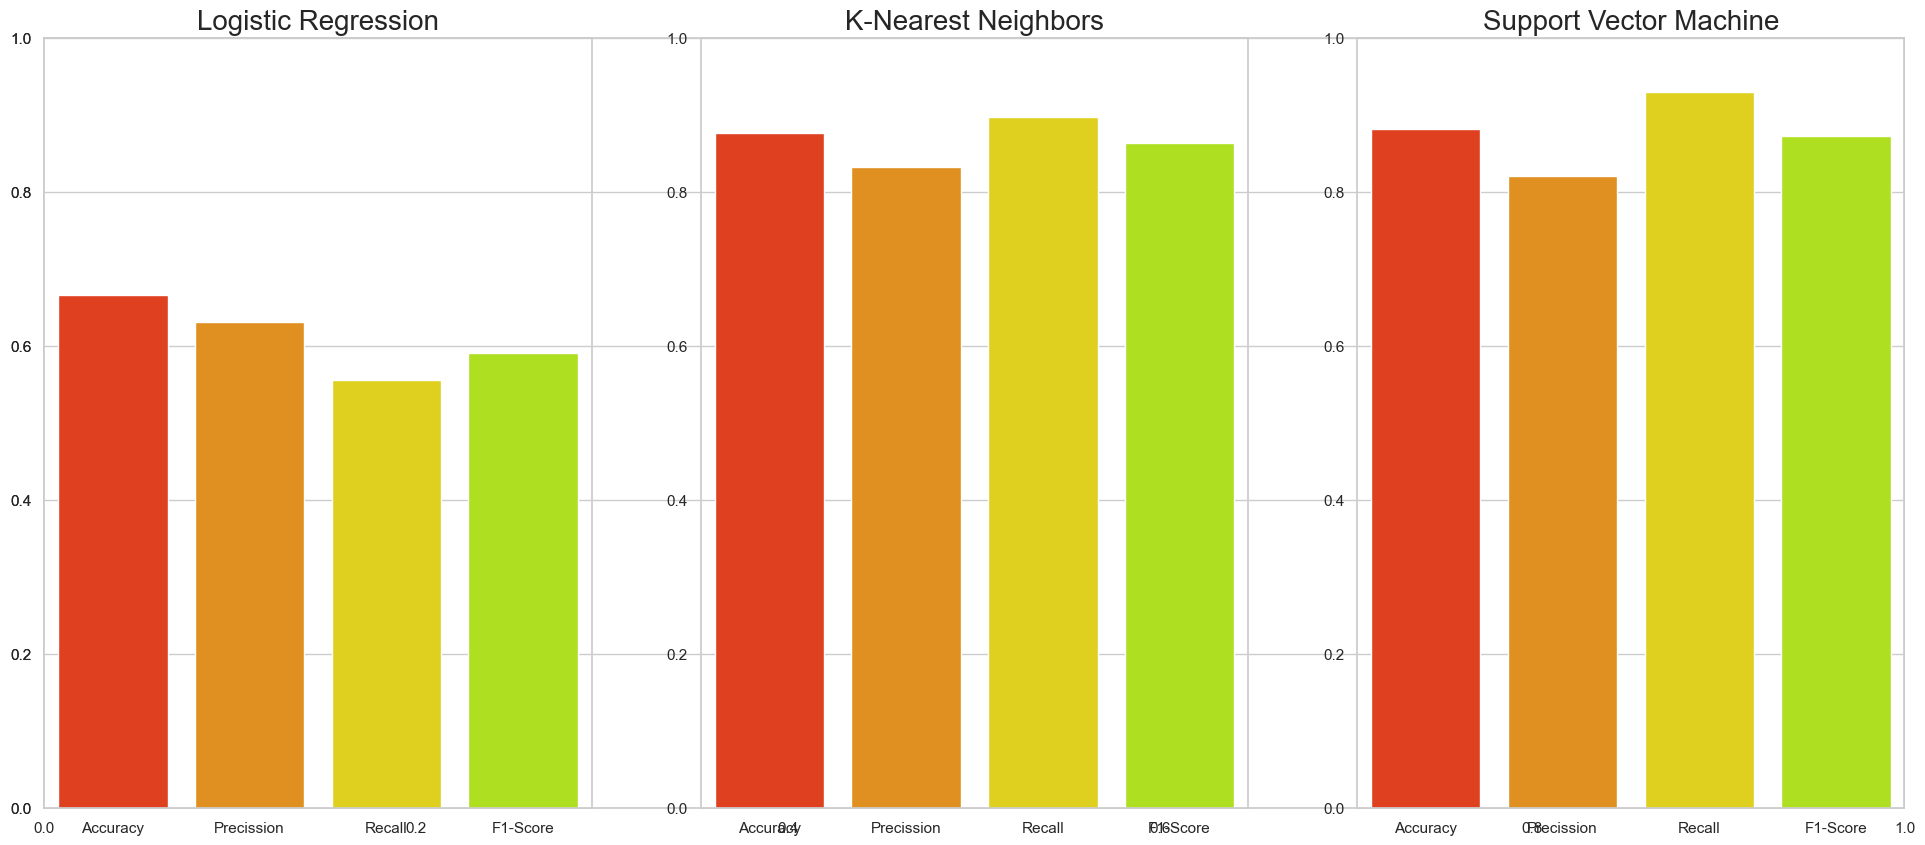

In [59]:
labels = ["Accuracy", "Precission", "Recall", "F1-Score"]
plt.figure(figsize = (24,10))
plt.ylim(0, 1)
displayBarPlot(labels, 1, 3, 1, dict(comp["Logistic Regression"]), "Logistic Regression", show_val = False, ylim = (0, 1))
displayBarPlot(labels, 1, 3, 2, dict(comp["K-Nearest Neighbors"]), "K-Nearest Neighbors", show_val = False, ylim = (0, 1))
displayBarPlot(labels, 1, 3, 3, dict(comp["Support Vector Machine"]), "Support Vector Machine", show_val = False, ylim = (0, 1))

**Conclusion**  
At a first view, Support Vector Machine seems to be the model with the best prediction scores. It predicts a risk of heart attack with 88.90% accuracy. However, concidering the True Positive Rate (Recall) index, **we select K-Nearest Neighbors (knn) as the best choice** : it is very important in this case to have a better TPR, even if its Accuracy is 5.5% lower and Precission is 10% lower than SVM.

# 3. Test Selected Model  

In [62]:
# Input the data
test_data = [[46, 0, 180, 150, 70, 21.5, 76, 120]]

test_df = pd.DataFrame (test_data, columns = top_features)
test_df

,age,cigarettesPerDay,cholesterolLevel,systolicBloodPressure,diastolicBloodPressure,BMI,heartRate,glucoseLevel
0,46,0,180,150,70,21.5,76,120


In [63]:
# Scale data for prediction
test_df_scaled = scaler.transform(test_df)
test_df_ = pd.DataFrame(test_df_scaled)
test_df_

,0,1,2,3,4,5,6,7
0,-0.598967,-0.786717,-1.316435,0.568468,-1.170585,-1.161909,0.003431,1.27312


In [64]:
prediction = knn.classifier.predict(test_df_)
if prediction[0] == 0:
    print ("No risk. Keep up the good work!")
else:
    print ("You are a risk of Heart Attack!! Better check with your doctor!")

No risk. Keep up the good work!


## 3.1. Save Model

In [66]:
import pickle

filename = "knn-model.pkl"
pickle.dump(knn.classifier, open(filename, "wb"))

## 3.2. Open Model

In [68]:
loaded_model = pickle.load(open(filename, "rb"))
pred = loaded_model.predict(test_df_)
pred

array([0])